In [1]:
import cv2
import sklearn
import glob
from skimage.feature import hog, daisy, canny
from skimage.filters import sobel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [16]:
import matplotlib.pyplot as plt # 展示图像处理效果

### 1. T1  start

Read in Dataset

In [17]:
# change the dataset path here according to your folder structure
dataset_path = "D:\\vcGroup\images\\"

X = []
y = []

for i in glob.glob(dataset_path + '*.png', recursive=True):
    label = i.split("images")[1][1:4]
    y.append(label)
    image = cv2.imread(i)
    X.append(image)

Now have X, y with 5998 entries on each.

###  2. T2 start
Preprocessing
- 48x48
- grayscale
- Gaussian blur

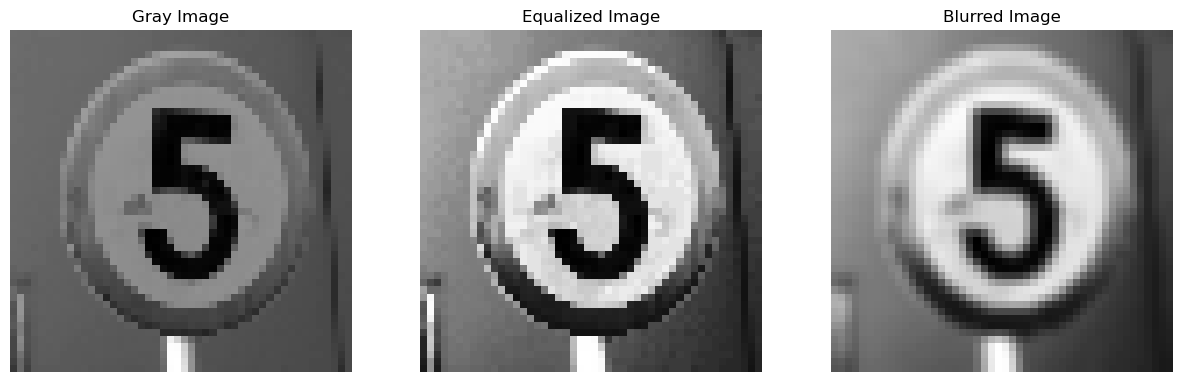

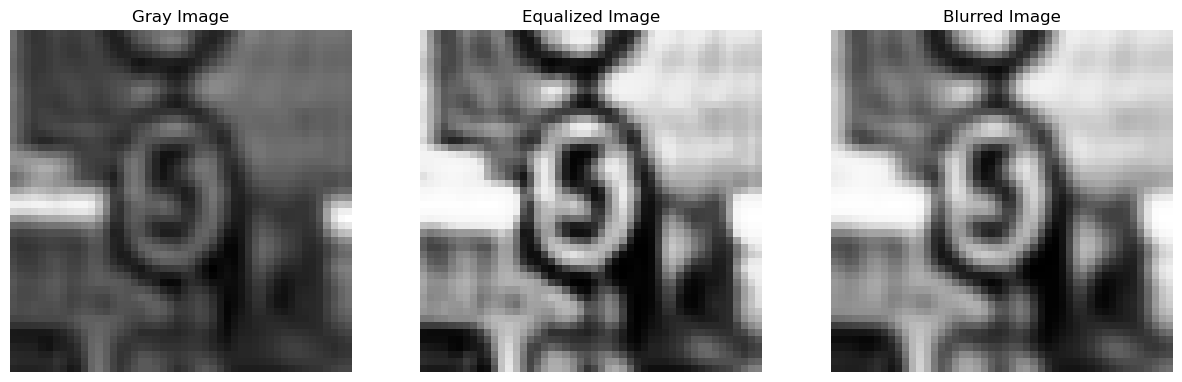

In [27]:
X_processed = []

for x in X:
    # resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # convert temp_x  to grayscale
    gray_x = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # 图像增强：直方图均衡化
    equ_x = cv2.equalizeHist(gray_x)
    # normalize_x = equ_x/255
    # Apply Gaussian blur to reduce noise
    blurred_x = cv2.GaussianBlur(equ_x, (3, 3), 0)  # Adjust the kernel size as per your requirements
    # Append the converted image into X_processed
    X_processed.append(blurred_x)


    # Added: Display gray_x and equ_x for the first image in the list'
    if (len(X_processed) == 1 or len(X_processed) == 2):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.title('Gray')
        plt.imshow(gray_x, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Equalized')
        plt.imshow(equ_x, cmap='gray') 
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Blurred')
        plt.imshow(blurred_x, cmap='gray')  # Display the blurred image
        plt.axis('off')
        
        plt.show()

- 灰度（gray_scale）：将彩色图像转换为灰度图像，只保留亮度信息，去除颜色信息.
- 直方图均衡化（equalized）：重新分配图像的像素值，增加图像的对比度和亮度分布.
- 高斯模糊（Gaussian Blur）：对图像中每个像素周围的像素进行加权平均来降低图像中的噪声和细节，从而产生一种模糊效果，使图像更加平滑.

### 3-1. T3&T4 【Feature: hog】

C:\Users\feouna\AppData\Local\Temp\ipykernel_13588\2679575868.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  x_feature, hog_image= hog(x, orientations=16, pixels_per_cell=(8, 8),


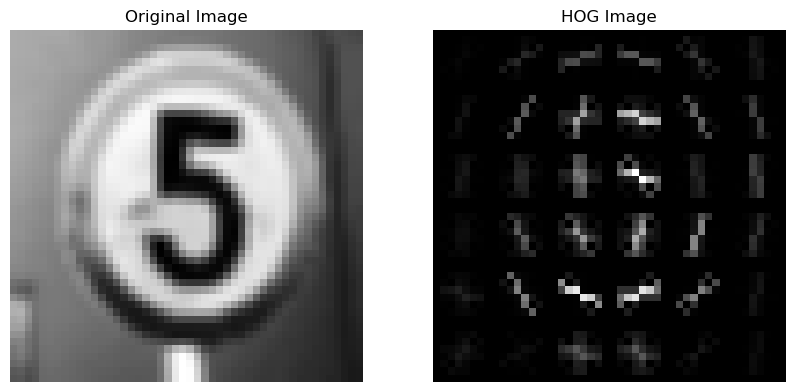

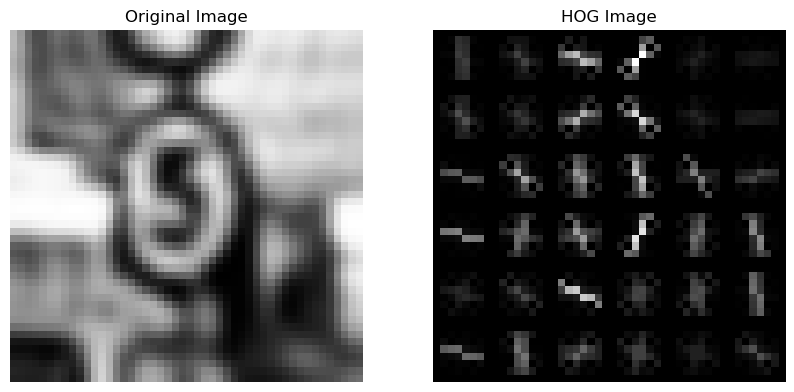

In [41]:
# Feature extraction
X_features = []
for x in X_processed:
    x_feature, hog_image= hog(x, orientations=16, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
    X_features.append(x_feature)

    # Display HOG image
    if (len(X_features) == 1 or len(X_features)==2):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(x, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('HOG Image')
        plt.imshow(hog_image, cmap='gray')
        plt.axis('off')

        plt.show()

# Split training & testing sets using sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)



#### Classification with different classifiers:
- SVM
- LR
- Decision Tree
- K-Neighbors
- Random Forests
- MLP

In [35]:
# svm
classifier = SVC()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("svm分类器准确率：", accuracy)


svm分类器准确率： 0.9766666666666667


In [36]:
# LogisticRegression
classifier = LogisticRegression(max_iter=500) 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("LR分类器准确率：", accuracy)

LR分类器准确率： 0.9866666666666667


In [37]:
# DecisionTree
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("DecisionTreeClassifier准确率：", accuracy)

DecisionTreeClassifier准确率： 0.93


In [38]:
# K-Neighbors
classifier = KNeighborsClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("KNeighborsClassifier准确率：", accuracy)

KNeighborsClassifier准确率： 0.9058333333333334


In [39]:
# RandomForest
classifier = RandomForestClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("RandomForestClassifier准确率：", accuracy)

RandomForestClassifier准确率： 0.9733333333333334


In [40]:
# MLP
classifier = MLPClassifier()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("MLPClassifier准确率：", accuracy)

MLPClassifier准确率： 0.9916666666666667


### 3-2. T3&T4 【Feature: Daisy】

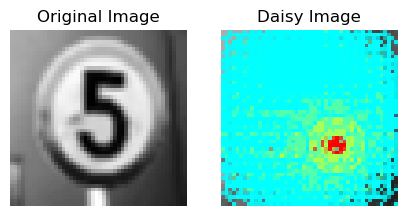

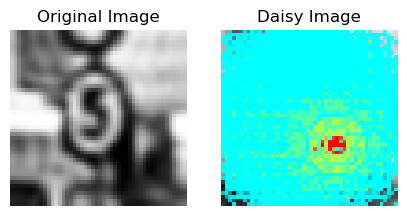

In [45]:
# Feature extraction
X_features = []
for x in X_processed:
    x_feature, daisy_image = daisy(x, step=4, radius=15, rings=3, histograms=8, orientations=8,
                     normalization='l1', sigmas=None, ring_radii=None, visualize=True)
    X_features.append(x_feature)
    X_features = [feature.flatten() for feature in X_features]


    # Display Daisy image 
    if (len(X_features) == 1 or len(X_features)==2):
        plt.figure(figsize=(5, 5))

        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(x, cmap='gray')
        plt.axis('off')


        plt.subplot(1, 2, 2)
        plt.title('Daisy Image')
        plt.imshow(daisy_image, cmap='gray')
        plt.axis('off')

        plt.show()


# Split training & testing sets using sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)



#### Classification with different classifiers:
- SVM
- LR
- Decision Tree
- K-Neighbors
- Random Forests
- MLP

In [46]:
# svm
classifier = SVC() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("svm分类器准确率：", accuracy)


svm分类器准确率： 0.9791666666666666


In [47]:
# LogisticRegression
classifier = LogisticRegression(max_iter=500)  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("LR分类器准确率：", accuracy)

LR分类器准确率： 0.45166666666666666


#### Why LR performs so bad? 

In [48]:
# DecisionTreeClassifier
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("DecisionTreeClassifier准确率：", accuracy)

DecisionTreeClassifier准确率： 0.96


In [50]:
# KNeighborsClassifier
classifier = KNeighborsClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("KNeighborsClassifier准确率：", accuracy)

KNeighborsClassifier准确率： 0.9241666666666667


In [51]:
# RandomForest
classifier = RandomForestClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("RandomForestClassifier准确率：", accuracy)

RandomForestClassifier准确率： 0.9933333333333333


In [52]:
# MLP
classifier = MLPClassifier() 
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("MLPClassifier准确率：", accuracy)

MLPClassifier准确率： 0.9658333333333333


d:\LearningSoftwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 3-3. T3&T4 【Feature: Canny】

In [49]:

# Feature extraction
X_features = []
for x in X_processed:
    x_feature = canny(x)
    X_features.append(x_feature)

X_features = [feature.flatten() for feature in X_features]

# Split training & testing sets using sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)



#### Classification with different classifiers:
- SVM
- LR
- Decision Tree
- K-Neighbors
- Random Forests
- MLP

In [25]:
# svm
classifier = SVC() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("svm分类器准确率：", accuracy)


svm分类器准确率： 0.8933333333333333


In [26]:
# LogisticRegression
classifier = LogisticRegression(max_iter=1000) 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("LR分类器准确率：", accuracy)

LR分类器准确率： 0.9216666666666666


In [27]:
# DecisionTree
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("DecisionTreeClassifier准确率：", accuracy)

DecisionTreeClassifier准确率： 0.8833333333333333


In [28]:
# KNeighbors
classifier = KNeighborsClassifier()  
classifier.fit(x_train, y_train) 

# # test accuracy
accuracy = classifier.score(x_test, y_test)
print("KNeighborsClassifier准确率：", accuracy)

KNeighborsClassifier准确率： 0.485


In [29]:
# RandomForest
classifier = RandomForestClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("RandomForestClassifier准确率：", accuracy)

RandomForestClassifier准确率： 0.9183333333333333


In [50]:
# MLPClassifier
classifier = MLPClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("MLPClassifier准确率：", accuracy)

MLPClassifier准确率： 0.9066666666666666


### 3-4. T3&T4 【Feature: Sobel】

In [51]:
# Feature extraction
X_features = []
for x in X_processed:
    x_feature = sobel(x)
    X_features.append(x_feature)

X_features = [feature.flatten() for feature in X_features]

# write code to Split training & testing sets using sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)



#### Classification with different classifiers:
- SVM
- LR
- Decision Tree
- K-Neighbors
- Random Forests
- MLP

In [31]:
# svm
classifier = SVC()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("svm分类器准确率：", accuracy)


svm分类器准确率： 0.9125


In [32]:
# LogisticRegression
classifier = LogisticRegression(max_iter=1000) 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("LR分类器准确率：", accuracy)

LR分类器准确率： 0.9391666666666667


In [33]:
# DecisionTree
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("DecisionTreeClassifier准确率：", accuracy)

DecisionTreeClassifier准确率： 0.9


In [34]:
# K-Neighbors
classifier = KNeighborsClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("KNeighborsClassifier准确率：", accuracy)

KNeighborsClassifier准确率： 0.7091666666666666


In [35]:
# RandomForest
classifier = RandomForestClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("RandomForestClassifier准确率：", accuracy)

RandomForestClassifier准确率： 0.9316666666666666


In [52]:
# MLP
classifier = MLPClassifier()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("MLPClassifier准确率：", accuracy)

MLPClassifier准确率： 0.965


### 3-5. T3&T4 【Feature: residuals】

In [53]:
# Feature extraction
X_features = []
for x in X_processed:
    x_feature = x - x.mean()
    X_features.append(x_feature)

X_features = [feature.flatten() for feature in X_features]

# Split training & testing sets using sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)



#### Classification with different classifiers:
- SVM
- LR
- Decision Tree
- K-Neighbors
- Random Forests
- MLP

In [37]:
# svm
classifier = SVC()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("svm分类器准确率：", accuracy)


svm分类器准确率： 0.9333333333333333


In [49]:
# LogisticRegression
classifier = LogisticRegression(max_iter=1000) 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("LR分类器准确率：", accuracy)

LR分类器准确率： 0.45166666666666666


In [39]:
# DecisionTree
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("DecisionTreeClassifier准确率：", accuracy)

DecisionTreeClassifier准确率： 0.9183333333333333


In [40]:
# K-Neighbors
classifier = KNeighborsClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("KNeighborsClassifier准确率：", accuracy)

KNeighborsClassifier准确率： 0.7958333333333333


In [41]:
# RandomForest
classifier = RandomForestClassifier() 
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("RandomForestClassifier准确率：", accuracy)

RandomForestClassifier准确率： 0.9666666666666667


In [54]:
# MLP
classifier = MLPClassifier()  
classifier.fit(x_train, y_train) 

# test accuracy
accuracy = classifier.score(x_test, y_test)
print("MLPClassifier准确率：", accuracy)

MLPClassifier准确率： 0.8283333333333334
